# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

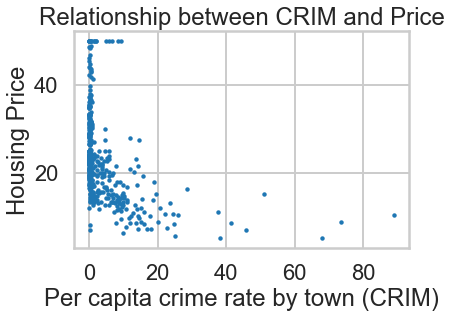

In [12]:
plt.scatter(bos.CRIM, bos.PRICE, s=6)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

your turn: describe relationship
There is a negative relationship, so as per capita crime rate increases, property price decreases. Although its hard to tell without drawing a regression line, it looks like the relationship is non-linear/curvilinear as there are so many data points clustered at zero crime rate with a wide range of property prices. The fact that property price differs across the range of prices at a zero crime rate suggests that crime rate is not the only predictor of property price. The cluster of data points with the highest property price that are just to the right of the zero point for crime rate suggests there are several locations where there is some crime but other factors such as proximity to cultural centers keeps the price high. This is seen to a much lesser degree by the two points that have the highest crime rate but are more expensive than the third data point from the right that has a lower property price.

Text(0.5, 1.0, 'Relationship between RM and Price')

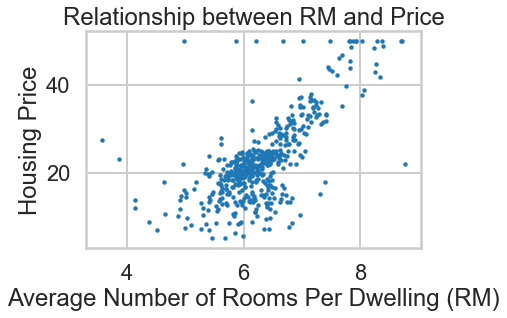

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, s=6)
plt.xlabel("Average Number of Rooms Per Dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

There looks to be a strong linear, positive relationship between the average number of rooms in a building and the housing price. This makes sense as the number of rooms is a basic element in assessing the property value of a building and contributes a great deal to the value of a building. There are several outliers at the maximum point of the range of housing prices, as well as in the middle of the range (along the x axis). Other factors must make these properties more valuable than their counterparts with similar average number of rooms.

Text(0.5, 1.0, 'Relationship between Pupil-Teacher Ratio and Price')

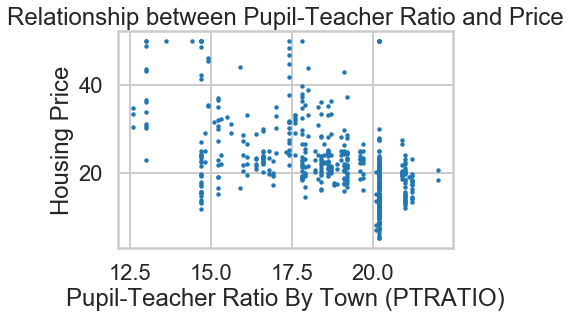

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, s=6)
plt.xlabel("Pupil-Teacher Ratio By Town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between Pupil-Teacher Ratio and Price")

There looks to be a fairly weak negative, linear relationship between pupil-teacher ratio and housing price. So as the pupil-teacher ratio increases, housing price gradually decreases. This makes sense as less students per class in public schools is thought as being better for the student, as each student gets more individual attention from the teacher. There are many outliers from this linear relationship in the upper end of the housing price range, which mirrors what is seen in some of the other scatter-plots. Namely, that there are other factors that can increase (or decrease) the value of a property beyond the predictor that is being individually looked at.

Text(0.5, 1.0, 'Relationship between Charles River Contiguity and Price')

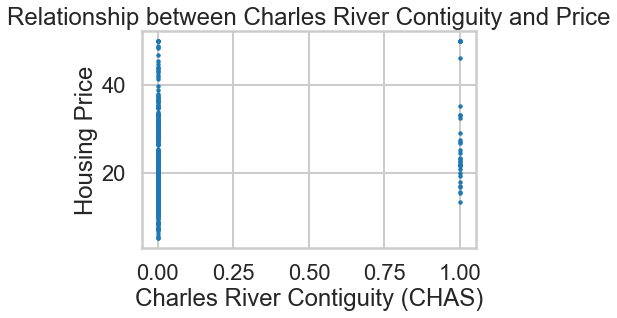

In [15]:
# your turn: create some other scatter plots
plt.scatter(bos.CHAS, bos.PRICE, s=6)
plt.xlabel("Charles River Contiguity (CHAS)")
plt.ylabel("Housing Price")
plt.title("Relationship between Charles River Contiguity and Price")

This scatterplot is interesting, as the Charles River contiguity feature is binary and not continuous. One can see that there is no linear or non-linear relationship possible because of the binary nature of the variable. Namely, the property is either contiguous to the river or it is not. One can see that there are fewer properties that are contiguous to the river (CHAS value of 1), but that these properties have a range of prices spreading from the upper part of the range to perhaps the 1st quartile. Most of these properties cluster roughly in the interquartile range, with a couple outliers near the max of the range. Those properties that are not contiguous to the river understandably encompass the entire range of housing prices. 

Text(0.5, 1.0, 'Relationship between Nitric Oxides Concentration and Price')

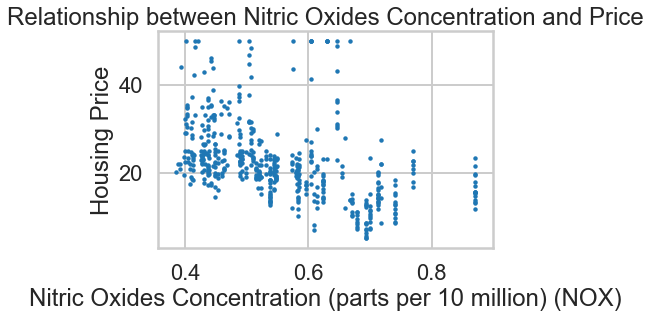

In [16]:
# your turn: create some other scatter plots
plt.scatter(bos.NOX, bos.PRICE, s=6)
plt.xlabel("Nitric Oxides Concentration (parts per 10 million) (NOX)")
plt.ylabel("Housing Price")
plt.title("Relationship between Nitric Oxides Concentration and Price")

There looks to be a rather weak, negative, linear relationship between nitric oxide concentration and housing price. So as the concentration goes up, the housing price goes down. This weak relationship may be due to a lack of education on what threat nitric oxide concentration has to property buyers, and perhaps a shortcoming in reporting this information to potential buyers. There are several outliers outside of this relationship on the upper end of the housing price range. This is again an example of how many predictors influence the final housing price.

Text(0.5, 1.0, 'Relationship between Proportion of Owner-Occupied Units Built Prior to 1940 and Price')

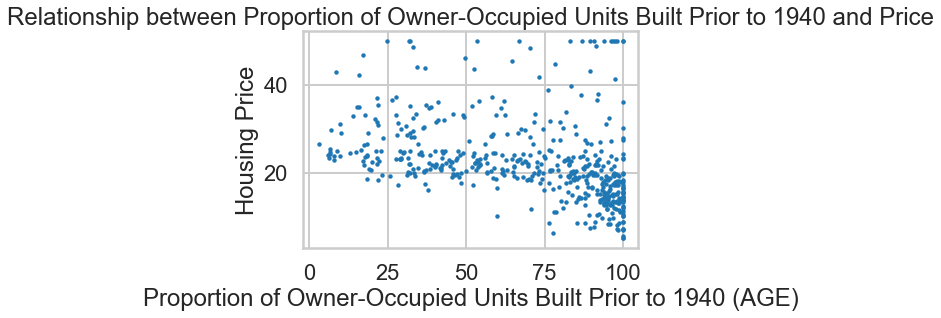

In [17]:
# your turn: create some other scatter plots
plt.scatter(bos.AGE, bos.PRICE, s=6)
plt.xlabel("Proportion of Owner-Occupied Units Built Prior to 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between Proportion of Owner-Occupied Units Built Prior to 1940 and Price")

There is almost no relationship between age and housing price, possibly a very weak negative linear relationship. So that as the proportion of units built prior to 1940 increases, the price slightly decreases. This makes sense in the context of Boston, as there are many older buildings that maintain their value due to quality of construction and pre-war appeal. 

Text(0.5, 1.0, 'Relationship between Proportion of Weighted Distances to Five Boston Employment Centres and Price')

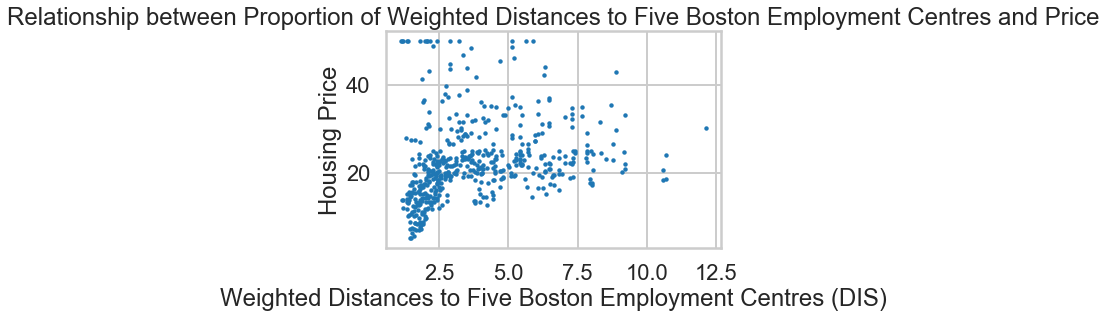

In [18]:
# your turn: create some other scatter plots
plt.scatter(bos.DIS, bos.PRICE, s=6)
plt.xlabel("Weighted Distances to Five Boston Employment Centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between Proportion of Weighted Distances to Five Boston Employment Centres and Price")

There looks to be a positive linear relationship between distance to Boston employment centres and housing price. The cluster of low-price buildings that are closest to employment centers is somewhat surprising, as shorter commutes are certainly more valued in urban settings in current times. However, this data was collected back in the 1970s, perhaps when more working class people could afford to live closer to their local jobs.

Text(0.5, 1.0, 'Relationship between Index of Accessibility to Radial Highways and Price')

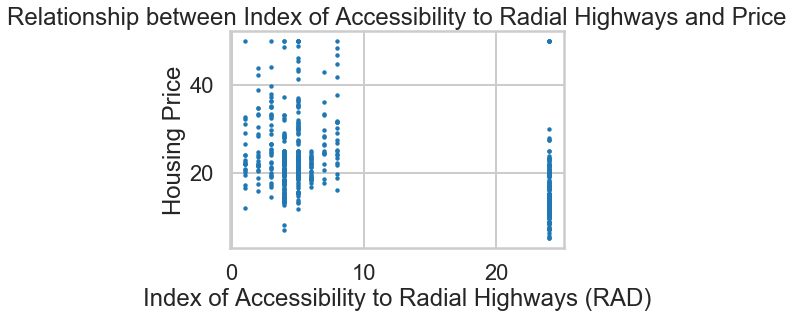

In [19]:
# your turn: create some other scatter plots
plt.scatter(bos.RAD, bos.PRICE, s=6)
plt.xlabel("Index of Accessibility to Radial Highways (RAD)")
plt.ylabel("Housing Price")
plt.title("Relationship between Index of Accessibility to Radial Highways and Price")

There looks to be perhaps a slightly negative linear relationship between these two variables. Although, the way the data points in the scatterplot resemble a series of strip plots makes me think that this index is more of a categorical variable than a continuous one, and perhaps shouldn't be used as a predictor in a linear regression model.

Text(0.5, 1.0, 'Relationship between B and Price')

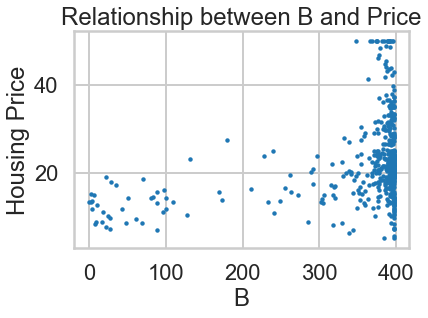

In [20]:
# your turn: create some other scatter plots
plt.scatter(bos.B, bos.PRICE, s=6)
plt.xlabel("B")
plt.ylabel("Housing Price")
plt.title("Relationship between B and Price")

There looks to be a weakly positive linear relationship between the "B" value and housing prices; "B" being a measure of African-American population in a town. I took a look at this relationship because I was surprised that this was a standard predictor of housing prices, and perhaps harkens back to "red-lining" laws that restricted African-Americans from buying properties in certain parts of U.S. cities. The value of "B" is computed by the following equation: "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town". So the lower the proportion of African-Americans in a town, the higher the "B" value. So this does show that property value has a positive linear relationship with a reduced proportion of African-Americans who live in the area.

Text(0.5, 1.0, 'Relationship between % Lower Status of the Population and Price')

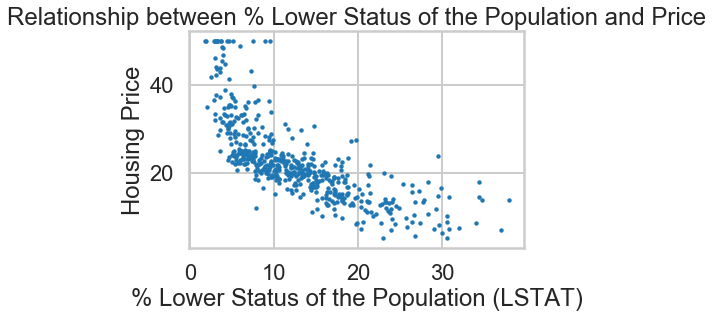

In [21]:
# your turn: create some other scatter plots
plt.scatter(bos.LSTAT, bos.PRICE, s=6)
plt.xlabel("% Lower Status of the Population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between % Lower Status of the Population and Price")

Here, we see a much stronger negative linear relationship between LSTAT and housing price. Its not clear how "lower status" is defined, but we see that as the percentage of the "lower status" of the population increases, the housing price decreases. This makes sense as people with less income will naturally buy properties of lower value and more affluent people generally prefer to live around people of similar affluence. There are no real outliers here.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

In [22]:
?sns.regplot

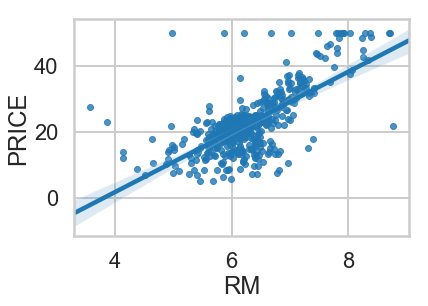

In [23]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True, marker='.')

### Histograms
***


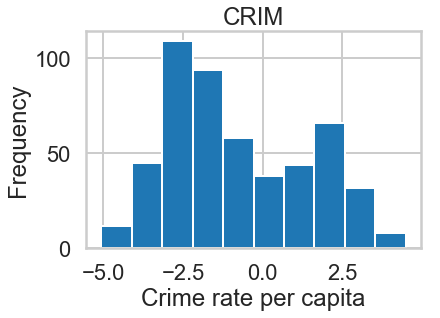

In [24]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

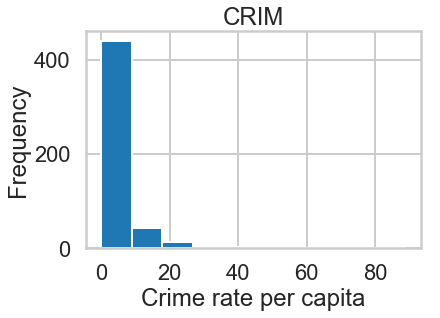

In [25]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

By using the logarithm of the crime rate per capita, we can see with greater resolution the distribution of the differing crime rates. Without the logarithmic transformation, one wouldn't see the crime rate with the highest frequency, and that there are lower crime rates that have lower frequency to the left of this peak.

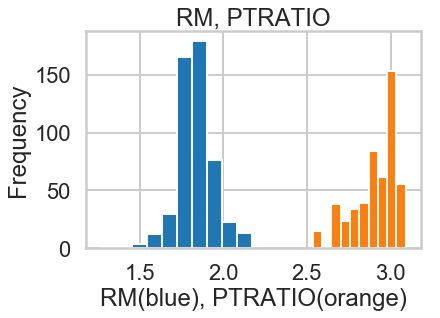

In [26]:
plt.hist(np.log(bos.RM))
plt.hist(np.log(bos.PTRATIO))
plt.title("RM, PTRATIO")
plt.xlabel("RM(blue), PTRATIO(orange)")
plt.ylabel("Frequency")
plt.show()

One can see that the number of rooms in a building and the parent-teacher ratio do not have overlapping frequency distributions. This suggests that there may not be a correlation between the two variables.

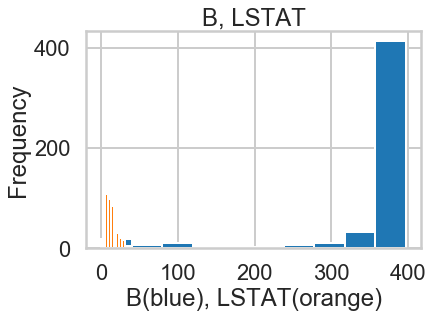

In [27]:
plt.hist(bos.B)
plt.hist(bos.LSTAT)
plt.title("B, LSTAT")
plt.xlabel("B(blue), LSTAT(orange)")
plt.ylabel("Frequency")
plt.show()

The frequency distributions of 'B' and 'LSTAT' do overlap, suggesting that there may be some correlation between the two variables.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [28]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.49e-74
Time:                        12:37:29   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5, 1.0, 'Relationship between Fitted Housing Price and Original Housing Price')

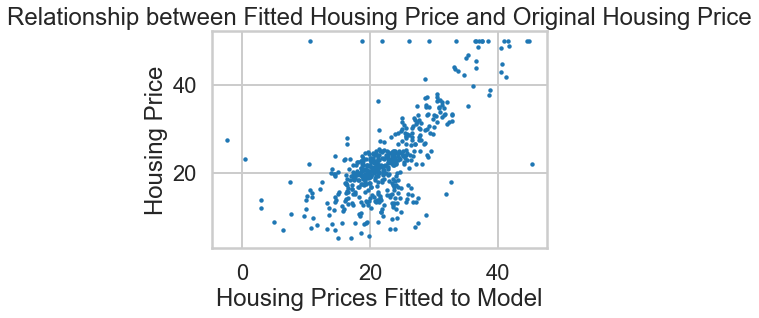

In [30]:
# your turn
plt.scatter(m.fittedvalues, bos.PRICE, s=6)
plt.xlabel("Housing Prices Fitted to Model")
plt.ylabel("Housing Price")
plt.title("Relationship between Fitted Housing Price and Original Housing Price")

It looks like there is a fairly strong positive linear relationship between the fitted housing prices and the original housing prices. However, there is a fair amount of prediction errors, as can be seen by housing prices that have a fitted value around 20k and an actual value of over 40k. There is a line of high-value properties that seem to exist outside of the regression line.

### Fitting Linear Regression using `sklearn`


In [31]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predict()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [32]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [33]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


your turn


To change the model to not fit an intercept term, one can change the 'fit_intercept' parameter to False when calling lm.fit. So it would read 'lm.fit(X, bos.PRICE, fit_intercept=False)'. This would result in the regression line passing through the origin (0,0), like the reading and writing example given at the ucla.edu link above. 


I would recommend having an intercept for this dataset. This is because the fitted housing prices for properties in Boston could not be zero, or without value. 

Given the assumption of the linear model that the residuals must be independently and identically distributed, it is not enough that the residuals are normally distributed because they also must be independently distributed.


To use linear regression, Y does NOT have to be normally distributed. The distribution of the Y-residuals is normally distributed, but there are many examples in nature where the dependent variable is not normally distributed and linear regression can still be used on them.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [34]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [35]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [36]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [37]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

Text(0, 0.5, 'Frequency')

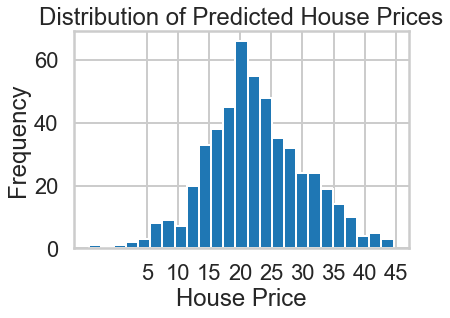

In [38]:
# your turn
plt.hist(lm.predict(X), bins=25)
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.title('Distribution of Predicted House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')

The center of the distribution is at around 20k. The shape is somewhat normal, although skewed slightly to the right. The spread is from 0 to 45k. There is an outlier that is illogical, as it is below the 0k line. This outlier must be an effect of the error of the prediction; it should be eliminated from the set of predicted values.

Text(0.5, 1.0, 'Relationship between Housing Prices Predicted from Model and Original Housing Price')

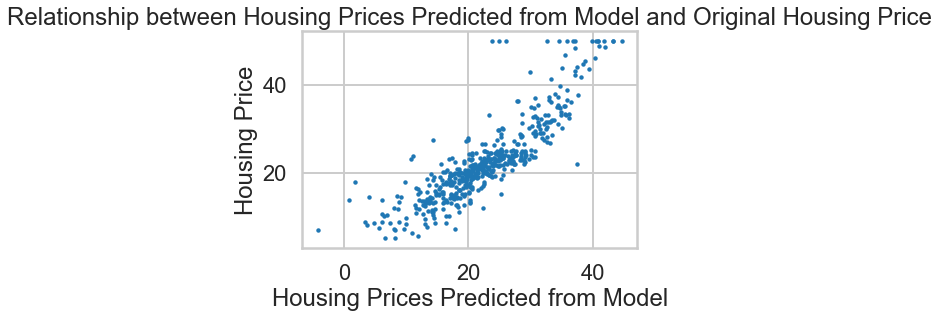

In [39]:
plt.scatter(lm.predict(X), bos.PRICE, s=6)
plt.xlabel("Housing Prices Predicted from Model")
plt.ylabel("Housing Price")
plt.title("Relationship between Housing Prices Predicted from Model and Original Housing Price")

The data points in the Sci-Kit Learn scatter-plot are more tightly clustered around a regression line; the data points in the StatsModel scatter-plot are less tightly clustered. This suggests that the Sci-Kit Learn's predictions are more accurate, which is a definite advantage. One advantage of StatsModels is that it has a nice summary table with a lot of good information in one place. Sci-Kit Learn has a simple method to see the estimated coefficients of any predictor in a multivariate linear regression, which is another advantage. 

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [40]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [41]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [42]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [43]:
X = bos.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT', 'PRICE'], axis = 1)

In [44]:
# your turn
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 62.34462747483265


In [46]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 1


In [47]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,PTRATIO,-2.157175


The coefficient for PTRATIO is -2.157175, showing that there is a negative relationship between parent-teacher ratio in public schools and housing price. That is, as the parent-teacher ratio decreases (so that there fewer students assigned to each teacher), housing prices go up. The regression coefficient for `PTRATIO` of -2.157175 means that *on average, each drop of one in the parent-teacher ratio is associated with an increase of $\$2,157$ in house price net of the other variables*. The intercept of 62.34 means that, based on the regression line, a $\$0$ housing price has a theoretical parent-teacher ratio of 62.34. 

In [48]:
rss = np.sum((bos.PRICE - lm.predict(X)) ** 2)
rss

31702.013206967255

In [49]:
ess = np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)
ess

11014.282208052502

In [50]:
tss = ess + rss
tss

42716.295415019755

In [51]:
r_squared = ess / tss
r_squared

0.2578473180092227

The r squared value of 0.2578 tells me that approximately 26% of the variance in housing price can be explained by the parent-teacher ratio.

In [52]:
n = len(bos)
n

506

In [53]:
mse = rss / (n - 1) - 1
mse

61.77626377617278

In [54]:
msr = ess / 1
msr

11014.282208052502

In [55]:
f = msr / mse
f

178.29311024634563

The critical value from the f-distribution table for a p-value of 0.01, and for 1 degree of freedom in the numerator, and for 504 degrees of freedom in the denominator is 6.8509. The f-score of 178.29 is well above this, so we can reject the null hypothesis that parent-teacher ratio has no effect on housing price.

In [56]:
#The t value can be calculated by dividing the regression coefficient for PTRATIO by the mean standard error.
t = -2.157175 / mse
t

-0.0349191561311616

The F-statistic is positive and the t-statistic for this simple linear regression is negative. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [57]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [58]:
# your turn
X = bos.drop(['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT', 'PRICE'], axis = 1)

In [59]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
lm.predict(X)[0:5]

array([28.79014801, 24.97539733, 30.61403551, 28.27026594, 29.36242923])

In [61]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -3.3707043351542687


In [62]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 3


In [63]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.204961
1,RM,7.380411
2,PTRATIO,-1.069546


In [64]:
rss = np.sum((bos.PRICE - lm.predict(X)) ** 2)
rss

17328.23712008025

In [65]:
ess = np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)
ess

25388.05829493949

In [66]:
tss = ess + rss
tss

42716.29541501974

In [67]:
n = len(bos)
n

506

In [68]:
mse = rss / (n - 3) - 1
mse

33.44977558664066

In [69]:
msr = ess / 3
msr

8462.686098313163

In [70]:
f = msr / mse
f

252.99679743421157

With the addition of two more predictive variables beyond PTRATIO, the f-statistic has increased from 178 to 253, with the critical value for p < 0.01 being 3.78. The null hypothesis is still rejected, so the three predictive variables do have an effect on the housing price. This is seen even more strongly with the three predictive variables than just with 'PTRATIO'. 

In [71]:
r_squared = ess / tss
r_squared

0.5943412940723468

The r-squared value is now 0.59, which shows that 59% of the variance in housing price is due to the parent-teacher ratio, the crime rate, and the number of rooms in a building combined. One can see by looking at the regression coefficients that the number of rooms has the greatest effect, which is understandable as the number of rooms in a building is a prime driver of value. Crime rate has a very modest negative relationship, and the effect of PTRATIO on housing price has already been explored (see above), but interestingly has lessened in combination with the other two variables. This modified coefficient shows that if the price is more affected by the number of rooms in a building than by the parent-teacher ratio. This is understandable as not everyone who buys a building is a parent of school-age children and therefore parent-teacher ratio is less important to them.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [72]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [73]:
X_full = bos.drop(['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PRICE'], axis = 1)

In [74]:
lm.fit(X_full, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 11.615005996560745


In [76]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 5


In [77]:
pd.DataFrame({'features': X_full.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.038921
1,RM,4.788176
2,PTRATIO,-0.877249
3,B,0.009593
4,LSTAT,-0.495139


In [78]:
rss_full = np.sum((bos.PRICE - lm.predict(X_full)) ** 2)
rss_full

13297.619603758496

In [79]:
ess_full = np.sum((lm.predict(X_full) - np.mean(bos.PRICE)) ** 2)
ess_full

29418.675811261648

In [80]:
tss_full = ess_full + rss_full
tss_full

42716.29541502014

In [81]:
n = len(bos)
n

506

In [82]:
mse_full = rss_full / (n - 5) - 1
mse_full

25.54215489772155

In [83]:
msr_full = ess_full / 5
msr_full

5883.735162252329

In [84]:
f_pt1 = (rss - rss_full) / (502 - 500)
f_pt1

2015.308758160878

In [85]:
f_pt2 = rss_full / 500
f_pt2

26.595239207516993

In [86]:
f_nested = f_pt1 / f_pt2
f_nested

75.77704951009662

In [87]:
m = ols('PRICE ~ X_full',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          3.39e-124
Time:                        12:39:16   Log-Likelihood:                -1545.0
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     500   BIC:                             3127.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6150      4.232      2.744      0.0

The AIC score is 3102. The f-statistic in the five feature model is significantly smaller (f=76) than the one in the three-feature model (253). Although both exceed the critical value needed to reject the null hypothesis, the three-feature model has a higher F value, and is therefore better.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [88]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [89]:
X = bos.drop(['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT', 'PRICE'], axis = 1)

In [90]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
predicts = lm.predict(X)
predicts[0:5]

array([28.79014801, 24.97539733, 30.61403551, 28.27026594, 29.36242923])

In [92]:
three_predictor_residuals = bos.PRICE - predicts
three_predictor_residuals[0:5]

0   -4.790148
1   -3.375397
2    4.085964
3    5.129734
4    6.837571
Name: PRICE, dtype: float64

Text(0.5, 1.0, 'Relationship between Fitted Values and Residuals')

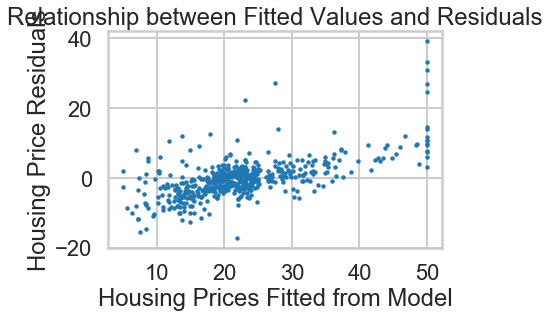

In [93]:
# Your turn.
plt.scatter(bos.PRICE, three_predictor_residuals, s=6)
plt.xlabel("Housing Prices Fitted from Model")
plt.ylabel("Housing Price Residuals")
plt.title("Relationship between Fitted Values and Residuals")

As can be seen here, there does seem to be a weak positive linear relationship between the two. If the residuals were normally distributed, there would be no pattern. So this plot does violate this model assumption.

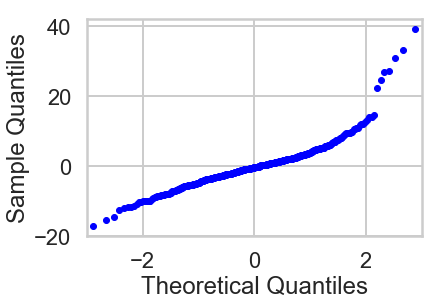

In [94]:
fig = sm.qqplot(three_predictor_residuals, marker='.')
plt.show()

It looks like the residuals are not completely normally distributed, as there is a curve to the line, and it is not straight.

The fitted vs residuals plot lets you see all of the actual data points explicitly charted against their residual. This allows you to see the level of error in prediction, given that most of the data points are not at the 0 line of the y axis. But the quantile plot allows you to see the curve of the distribution of residuals, and that there are about an equal amount of residuals under-predicted of the actual price as there are those that over-predicted. Both enable the viewing of the outliers.

In [95]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -3.3707043351542687


In [96]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 3


In [97]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.204961
1,RM,7.380411
2,PTRATIO,-1.069546


In [98]:
rss = np.sum((bos.PRICE - lm.predict(X)) ** 2)
rss

17328.23712008025

In [99]:
ess = np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)
ess

25388.05829493949

In [100]:
tss = ess + rss
tss

42716.29541501974

In [101]:
n = len(bos)
n

506

In [102]:
mse = rss / (n - 3) - 1
mse

33.44977558664066

In [103]:
msr = ess / 3
msr

8462.686098313163

In [104]:
f = msr / mse
f

252.99679743421157

In [105]:
r_squared = ess / tss
r_squared

0.5943412940723468

In [106]:
counts = bos.PRICE.value_counts().sort_index()
counts

5.0      2
5.6      1
6.3      1
7.0      2
7.2      3
7.4      1
7.5      1
8.1      1
8.3      2
8.4      2
8.5      2
8.7      1
8.8      2
9.5      1
9.6      1
9.7      1
10.2     3
10.4     2
10.5     2
10.8     1
10.9     2
11.0     1
11.3     1
11.5     1
11.7     2
11.8     2
11.9     2
12.0     1
12.1     1
12.3     1
        ..
35.2     1
35.4     2
36.0     1
36.1     1
36.2     2
36.4     1
36.5     1
37.0     1
37.2     1
37.3     1
37.6     1
37.9     1
38.7     1
39.8     1
41.3     1
41.7     1
42.3     1
42.8     1
43.1     1
43.5     1
43.8     1
44.0     1
44.8     1
45.4     1
46.0     1
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Name: PRICE, Length: 229, dtype: int64

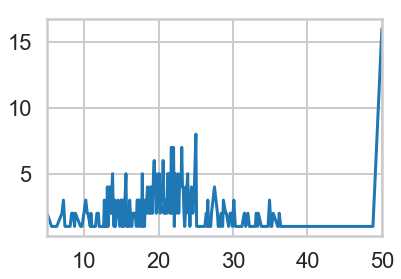

In [107]:
counts.plot()
plt.show()

The houses that are $\$50k$ are an outlier compared to the rest of the properties, but it makes sense that Boston properties would be over $\$50k$. The large number of properties at that price is likely just due to an artificial range constraint, and some of those properties may actually be over $\$50k$. Therefore, they should be left in the DataFrame and not be deleted or altered.

In [108]:
import statsmodels.formula.api as sm

In [109]:
model = sm.ols(formula = 'bos.PRICE ~ X', data=bos)

In [110]:
fitted = model.fit()

In [111]:
from statsmodels.graphics.regressionplots import *

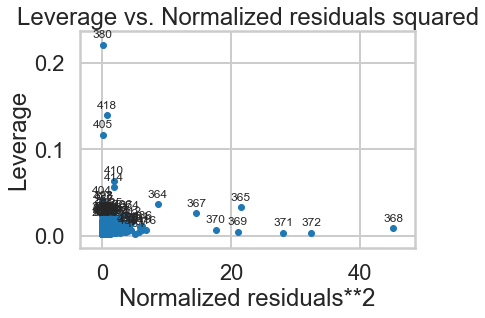

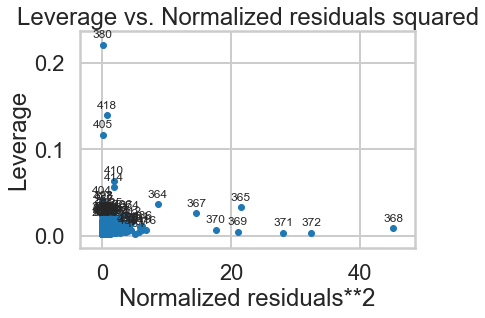

In [112]:
plot_leverage_resid2(fitted, marker=".")

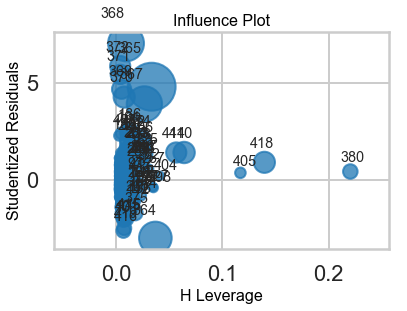

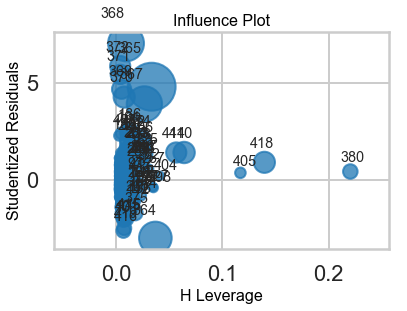

In [113]:
influence_plot(fitted, marker=".")

In [114]:
outliers = (bos.PRICE == 50.0)
outliers.value_counts()

False    490
True      16
Name: PRICE, dtype: int64

In [115]:
bos['outliers'] = outliers.astype(int)

In [116]:
bos['outliers'].value_counts()

0    490
1     16
Name: outliers, dtype: int64

In [117]:
bos.drop(bos[bos.outliers == 1].index, inplace=True)

In [118]:
bos['outliers'].value_counts()

0    490
Name: outliers, dtype: int64

In [119]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,outliers
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0


In [120]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,outliers
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.0
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918,0.0
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301,0.0
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000,0.0
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000,0.0
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000,0.0
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000,0.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000,0.0


In [121]:
three_eighty = bos.iloc[380]
three_eighty

CRIM          5.87205
ZN            0.00000
INDUS        18.10000
CHAS          0.00000
NOX           0.69300
RM            6.40500
AGE          96.00000
DIS           1.67680
RAD          24.00000
TAX         666.00000
PTRATIO      20.20000
B           396.90000
LSTAT        19.37000
PRICE        12.50000
outliers      0.00000
Name: 396, dtype: float64

In [122]:
four_o_five = bos.iloc[405]
four_o_five

CRIM          7.02259
ZN            0.00000
INDUS        18.10000
CHAS          0.00000
NOX           0.71800
RM            6.00600
AGE          95.30000
DIS           1.87460
RAD          24.00000
TAX         666.00000
PTRATIO      20.20000
B           319.98000
LSTAT        15.70000
PRICE        14.20000
outliers      0.00000
Name: 421, dtype: float64

In [123]:
four_eighteen = bos.iloc[418]
four_eighteen

CRIM         13.9134
ZN            0.0000
INDUS        18.1000
CHAS          0.0000
NOX           0.7130
RM            6.2080
AGE          95.0000
DIS           2.2222
RAD          24.0000
TAX         666.0000
PTRATIO      20.2000
B           100.6300
LSTAT        15.1700
PRICE        11.7000
outliers      0.0000
Name: 434, dtype: float64

The high leverage of these three data points is likely due to their high 'TAX' value, which is well above the mean and in the 3rd quartile. Let's see what removing them does to the model.

In [124]:
bos.drop(bos.index[[380, 405, 418]])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,outliers
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,0
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,0


In [125]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE', 'outliers'],
      dtype='object')

In [131]:
X = bos.drop(['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT', 'PRICE', 'outliers'], axis = 1)

In [132]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 1.0106211737294295


In [134]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 3


In [135]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.223237
1,RM,6.601897
2,PTRATIO,-1.068756


In [136]:
rss = np.sum((bos.PRICE - lm.predict(X)) ** 2)
rss

10993.262553428453

In [137]:
ess = np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)
ess

19257.725283306252

In [138]:
tss = ess + rss
tss

30250.987836734705

In [139]:
n = len(bos)
n

490

In [140]:
mse = rss / (n - 3) - 1
mse

21.573434401290456

In [141]:
msr = ess / 3
msr

6419.241761102084

In [142]:
f = msr / mse
f

297.55307577351266

In [143]:
r_squared = ess / tss
r_squared

0.6365982290310865

After removing the outliers and high leverage points, the intercept coefficient increased from -3.37 to 1.01. The 'CRIM' coefficient very slightly decreased from -0.20 to -0.22. The 'RM' coefficient decreased from 7.38 to 6.60, which is a significant finding. The 'PTRATIO' coefficient interestingly stayed the exact same as -1.07. The F score increased quite a bit from 253 to 297. The R-squared value very slightly increased from 0.59 to 0.64. 